<a href="https://colab.research.google.com/github/GabrielCaetano1/Modelo-de-analise-imagens-ML/blob/main/Analise_de_imagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Oficina 4: Este modelo analisa as imagens do MNIST do Tensorflow e as separa entre ímpar e par que representam Amigos e Familia respectivamente.

Importação das Libs:

In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam

Carregamento dos dados MNIST:

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Definição dos dados binários como 0 para par (Familia) e 1 para ímpar (Amigos):

In [4]:
y_train_bin = (y_train % 2 != 0).astype(np.int32)
y_test_bin = (y_test % 2 != 0).astype(np.int32)

Pré-processamento, normalização dos dados e ajustes de dimensões:

In [5]:
x_train = x_train / 255.0
x_test = x_test / 255.0

Adicionando a camada de cor:

In [6]:
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

Contrução e compilação do modelo CNN:

In [9]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

Treinamento do modelo:

In [17]:
history = model.fit(
    x_train, y_train_bin,
    epochs=10,
    batch_size=64,
    validation_data=(x_test, y_test_bin)
)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 48s 52ms/step - accuracy: 0.9966 - loss: 0.0086 - val_accuracy: 0.9932 - val_loss: 0.0214
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 49ms/step - accuracy: 0.9977 - loss: 0.0060 - val_accuracy: 0.9950 - val_loss: 0.0160
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 48ms/step - accuracy: 0.9983 - loss: 0.0050 - val_accuracy: 0.9954 - val_loss: 0.0177
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 84s 50ms/step - accuracy: 0.9989 - loss: 0.0036 - val_accuracy: 0.9936 - val_loss: 0.0237
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 48ms/step - accuracy: 0.9983 - loss: 0.0050 - val_accuracy: 0.9951 - val_loss: 0.0201
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 47s 50ms/step - accuracy: 0.9989 - loss: 0.0037 - val_accuracy: 0.9945 - val_loss: 0.0230
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 48ms/step - accuracy: 0.9987 - loss: 0.0033 - val_accuracy: 0.9943 - val_loss: 0.0238
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 85s 51ms/step - accuracy: 0.9998 - loss: 0.0012 - 

Plotar o desempenho do treinamento:

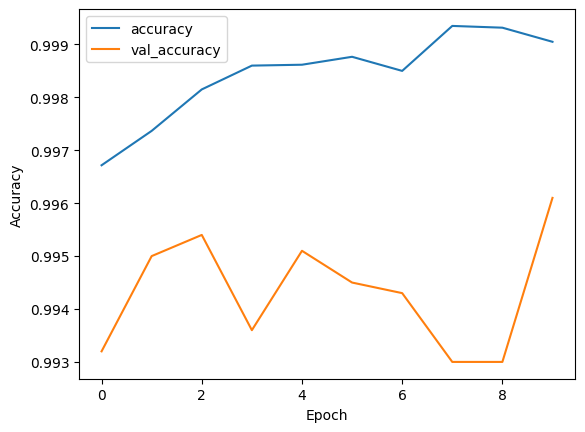

In [18]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Avaliar o modelo do conjunto de teste:

In [19]:
test_loss, test_acc = model.evaluate(x_test, y_test_bin)
print(f"Test accuracy: {test_acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9953 - loss: 0.0237
Test accuracy: 99.61%


Previsão com uma imagem de teste:

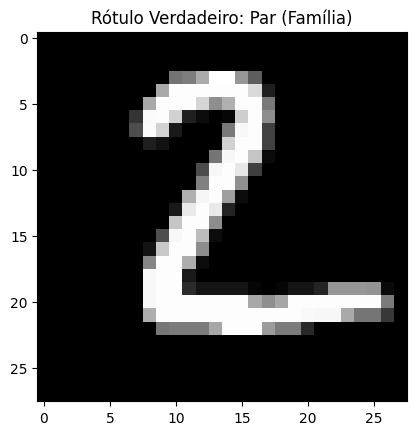

In [23]:
index = 1
plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
plt.title(f"Rótulo Verdadeiro: {'Impar (Amigos)' if y_test_bin[index] == 1 else 'Par (Família)'}")
plt.show()

Previsão do modelo:

In [24]:
prediction = model.predict(np.expand_dims(x_test[index], axis=0))
probability = prediction[0][0]
class_label = 'Ímpar (Amigos)' if probability > 0.5 else 'Par (Família)'
print(f"Probabilidade de Ímpar: {probability * 100:.2f}%")
print(f"Modelo previu: {class_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Probabilidade de Ímpar: 0.00%
Modelo previu: Par (Família)
